# Game Plan:


- linear regression, tree regression, random forest regression
- we are checking each one with cross validation
- we will check them with either mae or rmse (we'll read which is preferable)
- we find which is the best based on the smallest error
- and then we can do our feature selection (forward/backward) or forest tree selection for features
- and then fine tuning of hyper parameter depending on which regression we use (grid search)
- finally, we test our model :)

In [5]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.dummy import DummyRegressor
kf = KFold(n_splits=20, random_state=42, shuffle=True)


In [2]:
df=pd.read_csv('cleaned_glassdoor_dataset.csv',index_col=0)
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary_Per_Hour', 'Min_Salary', 'Max_Salary', 'Avg Salary', 'State',
       'Is_Headquarters', 'Age of Company', 'Python', 'Spark', 'AWS', 'Excel',
       'Job Categories', 'Seniority', 'Description_Length', 'Competitor Count',
       'Revenue_Adj'],
      dtype='object')

In [3]:
#need to know what this is
df2 = pd.read_csv('no_outlier_cleaned_data.csv',index_col=0)


In [4]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [6]:

df_n = pd.get_dummies(df.drop(['Job Title', 'Salary Estimate', 'Job Description',
                               'Company Name','Location','Headquarters','Founded','Competitors',
                               'Min_Salary','Max_Salary','Revenue'], axis=1))


X = df_n.drop(['Avg Salary', 'Size_-1','Sector_-1','Industry_-1'], axis=1)
y = df_n['Avg Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

X_train

,Rating,Is_Headquarters,Age of Company,Python,Spark,AWS,Excel,Description_Length,Competitor Count,Size_1 to 50 employees,...,Job Categories_Other,Job Categories_Other Engineer,Job Categories_Software Engineer,Seniority_Junior,Seniority_Senior,Seniority_none,Revenue_Adj_Unknown / Non-Applicable,Revenue_Adj_big,Revenue_Adj_medium,Revenue_Adj_small
318,3.2,0,30,1,1,1,1,208,0,1,...,0,0,0,0,1,0,0,0,0,1
533,3.6,1,33,1,0,1,1,753,0,0,...,0,0,0,0,0,1,1,0,0,0
539,3.1,1,147,0,0,0,1,698,0,0,...,0,0,0,0,1,0,0,1,0,0
653,4.2,0,14,1,0,0,1,765,0,0,...,0,0,0,0,0,1,1,0,0,0
586,3.5,0,30,1,0,0,0,158,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,3.5,0,25,1,1,0,0,151,3,0,...,0,0,0,0,0,1,1,0,0,0
79,3.6,1,95,1,0,0,1,370,0,0,...,0,0,0,0,0,1,0,1,0,0
759,2.8,1,50,0,0,0,0,481,3,0,...,0,0,0,0,0,1,0,0,1,0
730,3.6,0,171,0,1,1,1,541,0,0,...,1,0,0,0,0,1,0,1,0,0


In [6]:
df_n2 = pd.get_dummies(df2.drop(['Job Title', 'Salary Estimate', 'Job Description',
                               'Company Name','Location','Headquarters','Founded','Competitors',
                               'Min_Salary','Max_Salary','Revenue'], axis=1))


X2 = df_n2.drop(['Avg Salary', 'Size_-1','Sector_-1','Industry_-1'], axis=1)
y2 = df_n2['Avg Salary'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=777)

X2_train

,Rating,Is_Headquarters,Age of Company,Python,Spark,AWS,Excel,Description_Length,Competitor Count,Size_1 to 50 employees,...,Job Categories_Other,Job Categories_Other Engineer,Job Categories_Software Engineer,Seniority_Junior,Seniority_Senior,Seniority_none,Revenue_Adj_Unknown / Non-Applicable,Revenue_Adj_big,Revenue_Adj_medium,Revenue_Adj_small
325,2.8,1,8,1,0,0,1,777,0,0,...,0,0,0,0,1,0,1,0,0,0
674,4.4,1,38,1,0,0,0,345,0,0,...,0,0,0,0,1,0,0,1,0,0
396,3.3,1,14,0,0,0,0,232,0,0,...,0,0,0,0,0,1,1,0,0,0
895,3.3,1,34,0,0,0,1,1017,3,0,...,0,0,0,0,0,1,0,1,0,0
859,3.2,1,64,1,0,0,1,575,3,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,3.5,1,17,1,1,1,1,569,0,0,...,0,0,0,0,0,1,1,0,0,0
80,2.7,0,44,0,0,0,1,319,0,0,...,1,0,0,0,0,1,0,0,0,1
782,4.2,1,11,1,0,0,1,668,0,0,...,0,0,0,0,0,1,1,0,0,0
745,3.9,1,13,1,0,0,1,420,0,0,...,0,0,0,0,1,0,0,0,0,1


In [7]:
numerical_columns = ['Rating', 'Age of Company', 'Description_Length', 'Competitor Count']


In [8]:
# Standardization of train & test:

standard = StandardScaler()
normal = MinMaxScaler()

X_test_stand = X_test.copy()
X_train_stand = X_train.copy()
y_train_stand = y_train.copy()
y_test_stand = y_test.copy()


X_train_stand[numerical_columns] = standard.fit_transform(X_train_stand[numerical_columns])
X_test_stand[numerical_columns] = standard.transform(X_test_stand[numerical_columns])

print(X_train_stand.mean(axis=0))


Rating                                 -1.018485e-16
Is_Headquarters                         5.767285e-01
Age of Company                         -2.883210e-17
Python                                  5.278246e-01
Spark                                   2.276560e-01
                                            ...     
Seniority_none                          6.964587e-01
Revenue_Adj_Unknown / Non-Applicable    2.765599e-01
Revenue_Adj_big                         3.220911e-01
Revenue_Adj_medium                      8.094435e-02
Revenue_Adj_small                       3.204047e-01
Length: 166, dtype: float64


In [9]:
# Robust 

robust = RobustScaler()

X_test_robust = X_test.copy()
X_train_robust = X_train.copy()

X_train_robust[numerical_columns] = robust.fit_transform(X_train_robust[numerical_columns])
X_test_robust[numerical_columns] = robust.transform(X_test_robust[numerical_columns])

In [10]:
# Normalization of train & test:

normal = MinMaxScaler()

X_test_norm = X_test.copy()
X_train_norm = X_train.copy()

X_train_norm[numerical_columns] = normal.fit_transform(X_train_norm[numerical_columns])
X_test_norm[numerical_columns] = normal.transform(X_test_norm[numerical_columns])

In [7]:
# our means of checking how well our model is doing hehe

dummy_model = DummyRegressor()

dummy_model.fit(X_train, y_train)

R2 = dummy_model.score(X_test, y_test)

y_predict = dummy_model.predict(X_test)


print('Dummy Model Scores:')
print(f'R-Squared Value: {R2}') 


Dummy Model Scores:
R-Squared Value: -0.007879122082713241


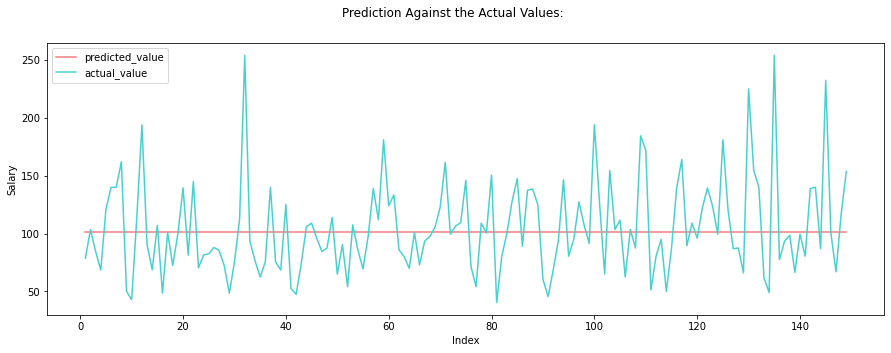

In [19]:
import matplotlib.pyplot as plt


index = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
axs.plot(index, y_predict, label='predicted_value', color='lightcoral')
axs.plot(index, y_test, label='actual_value', color='mediumturquoise')
axs.legend()
axs.set_xlabel('Index')
axs.set_ylabel('Salary')
fig.suptitle('Prediction Against the Actual Values:')
plt.show()

Our dummy model is taking the mean average salary and using that to "predict" the rest.
Dummy models set the standard for what a bad model looks like.
The R2 score is showing the percentage of accuracy of a model (from 0 to 1 mostly). When it is negative,
it is showing that the model does NOT follow the trend, which would make sense for our dummy model. 
Clearly this is showing us a very "bad" model to set the standard for how our models are doing in terms
of their RMSE scores. For this model, we are deviating by $40K, which we now know is a very poor score

In [12]:
# our means of checking how well our model is doing hehe

dummy_model2 = DummyRegressor()

dummy_model2.fit(X2_train, y2_train)

R22 = dummy_model2.score(X2_test, y2_test)

y2_predict = dummy_model2.predict(X2_test)

print('Dummy Model Scores:')
print(f'R-Squared Value: {R22}') 

Dummy Model Scores:
R-Squared Value: -0.0034232925890058663


# Linear Regression Model

In [13]:
# Linear Regression Model
#looked at rmse ,wondered why you switched ,im ok with it butg wanted to know

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


linear_reg1 = LinearRegression()
linear_reg2 = LinearRegression()
linear_reg3 = LinearRegression()
linear_reg5 = LinearRegression()

linear_reg1.fit(X_train,y_train)
linear_reg2.fit(X_train_norm,y_train)
linear_reg3.fit(X_train_stand,y_train)
linear_reg5.fit(X2_train,y2_train)

lrm = np.mean(cross_val_score(linear_reg1, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf))

norm_lrm = np.mean(cross_val_score(linear_reg2, X_train_norm, y_train, scoring='neg_mean_absolute_error', cv=kf))

stand_lrm = np.mean(cross_val_score(linear_reg3, X_train_stand, y_train, scoring='neg_mean_absolute_error', cv=kf))

out_lrm = np.mean(cross_val_score(linear_reg5, X2_train, y2_train, scoring='neg_mean_absolute_error', cv=kf))

r2_lin= np.mean(cross_val_score(linear_reg1, X_train, y_train, cv=kf))
r2out = np.mean(cross_val_score(linear_reg5, X2_train, y2_train, cv=kf))
stand_r2 = np.mean(cross_val_score(linear_reg3, X_train_stand, y_train, cv=kf))



print(f"mae with outliers: {lrm}")

print(f"mae with standarization: {stand_lrm}")

print(f"mae without outliers: {out_lrm}")

print(f"r2 with outliers: {r2_lin}")

print(f"r2 without outliers: {r2out}")

print(f"r2 with standarization: {stand_r2}")



mae with outliers: -18.576540293468323
mae with standarization: -296984653439.25964
mae without outliers: -18.42314895590754
r2 with outliers: 0.3941109643448034
r2 without outliers: 0.49430380297073667
r2 with standarization: -1.2801236996996863e+22


What we learned so far: 

-normalization of data for linear regression does not work! It creates a non-linear model

-removing outliers actually negatively affects the performance of linear regression

In [14]:
# trying feature selection so we can improve our score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test,i):
    
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=i)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

# 64 is clearly the best rn
#why?

In [23]:
#finding the best k for feature selection
r2_arr=[]
mae_arr=[]
for i in range(1,166):
    X_train_fs, X_test_fs, fs = select_features(X2_train, y2_train, X2_test,i)
    model = LinearRegression()
    model.fit(X_train_fs, y2_train)

    model_improved = np.mean(cross_val_score(model, X_train_fs, y2_train, scoring='neg_mean_absolute_error', cv=kf))
    r2_improved= np.mean(cross_val_score(model, X_train_fs, y2_train, cv=kf))
    r2_arr.append(r2_improved)
    mae_arr.append(model_improved)
    
    np.seterr(invalid='ignore')

print("done")

done


In [19]:
X2_train.shape, y2_train.shape


((581, 165), (581,))

In [24]:
def find_best(arr,r):
    maxn=-100
    maxI=0
    for i in range(r):
        if(maxn<arr[i]):
            maxn=arr[i]
            maxI=i+1
    return maxI

In [27]:
#note the index is the same for both r2 and mae so it doesnt matter which we use
maxIr2=find_best(r2_arr,165)
print(maxIr2)

maxIm=find_best(mae_arr,165)
print(maxIm)

79
111


In [28]:
X_train_fs, X_test_fs, fs = select_features(X2_train, y2_train, X2_test,79)
X_train_fsr, X_test_fsr, fsr = select_features(X2_train, y2_train, X2_test,111)


In [30]:
# improving our linear regression score with automatic feature selection

model = LinearRegression()
model.fit(X_train_fs, y2_train)
model2=LinearRegression()
model2.fit(X_train_fsr, y2_train)

mae_improved = np.mean(cross_val_score(model, X_train_fs, y2_train, scoring='neg_mean_absolute_error', cv=kf))
r2_improved= np.mean(cross_val_score(model2, X_train_fsr, y2_train, cv=kf))


print(mae_improved)
print(r2_improved)

-18.196115088358333
0.5163731941893638


After trying several values, we found that 74 of the "best" features creates the most accurate model for r2
and 78 of the "best" features creates the most accurate model for mae.
Our score definitely improved, but it appears that this model may not be our best bet. Let's try others!

In [ ]:
# what are the most correlated variables?

df3 = pd.get_dummies(df2.drop(['Job Title', 'Salary Estimate', 'Job Description',
                               'Company Name','Location','Headquarters','Founded','Competitors',
                               'Min_Salary','Max_Salary','Revenue'], axis=1))
corr_matrix = df3.corr()
corr_matrix['Avg Salary'].sort_values(ascending=False)

correlations = abs(corr_matrix['Avg Salary']).sort_values(ascending=False)
correlations.drop('Avg Salary', inplace=True)
correlations.head(25)


# Lasso Regression Function

In [195]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg2 = Lasso(alpha=0.1)
lasso_reg3 = Lasso(alpha=0.1)
lasso_reg4 = Lasso(alpha=0.1)


lasso_reg.fit(X_train,y_train)
lasso_reg2.fit(X2_train,y2_train)
lasso_reg3.fit(X_train_norm, y_train)
lasso_reg4.fit(X_train_stand, y_train)


lasso1 = np.mean(cross_val_score(lasso_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf))

lasso2 = np.mean(cross_val_score(lasso_reg2, X2_train, y2_train, scoring='neg_mean_absolute_error', cv=kf))

lasso3 = np.mean(cross_val_score(lasso_reg3, X_train_norm, y_train, scoring='neg_mean_absolute_error', cv=kf))

lasso4 = np.mean(cross_val_score(lasso_reg4, X_train_stand, y_train, scoring='neg_mean_absolute_error', cv=kf))




lasso1_r2 = np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=kf))

lasso2_r2 = np.mean(cross_val_score(lasso_reg2, X2_train, y2_train, cv=kf))

lasso3_r2 = np.mean(cross_val_score(lasso_reg3, X_train_norm, y_train, cv=kf))

lasso4_r2 = np.mean(cross_val_score(lasso_reg4, X_train_stand, y_train, cv=kf))



print(f"mae with outliers: {lasso1}")

print(f"mae without outliers: {lasso2}")

print(f"mae norm: {lasso3}")

print(f"mae stand: {lasso4}")


print(f"r2 with outliers: {lasso1_r2}")

print(f"r2 without outliers: {lasso2_r2}")

print(f"r2 norm: {lasso3_r2}")

print(f"r2 stand: {lasso4_r2}")




mae with outliers: -19.261278813290016
mae without outliers: -19.291250844257434
mae norm: -19.198549311996814
mae stand: -19.252074076179376
r2 with outliers: 0.44506528473552515
r2 without outliers: 0.49353307907376653
r2 norm: 0.4471383124084344
r2 stand: 0.44619732991519234


It appears that the error is around the same as linear regression but the r2 score is better. 
standarization/normalization aren't making much of a difference

Let's see if feature engineering can optimize it. We will once again work with the model with outliers

In [196]:
def select_features2(X_train, y_train, X_test,i):
    
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=i)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


In [197]:
#X_train_fs2, X_test_fs2, fs2 = select_features2(X_train, y_train, X_test)
r2arr2=[]
modelI2=[]
for i in range(1,167):
    X_train_fs2, X_test_fs2, fs2 = select_features2(X_train, y_train, X_test,i)
    model2 = Lasso(alpha=0.1)
    model2.fit(X_train_fs2, y_train)

    model2_improved = np.mean(cross_val_score(model2, X_train_fs2, y_train, scoring='neg_mean_absolute_error', cv=kf))
    r2_improved2= np.mean(cross_val_score(model2, X_train_fs2, y_train, cv=kf))

    r2arr2.append(r2_improved2)
    modelI2.append(model2_improved)
    np.seterr(invalid='ignore')

print("done")

done


In [198]:
#note the index is the same for both r2 and mae so it doesnt matter which we use
maxIr2=find_best(r2arr2,166)
print(maxIr2)

maxIm=find_best(modelI2,166)
print(maxIm)

74
74


In [199]:
X_train_fs2, X_test_fs2, fs2 = select_features2(X_train, y_train, X_test,74)


In [200]:
model2 = Lasso(alpha=0.1)
model2.fit(X_train_fs2, y_train)

model2_improved = np.mean(cross_val_score(model2, X_train_fs2, y_train, scoring='neg_mean_absolute_error', cv=kf))
r2_improved2= np.mean(cross_val_score(model2, X_train_fs2, y_train, cv=kf))


print(model2_improved)
print(r2_improved2)

-18.922651535660535
0.47067172732247925


74 is our best score in this feature selection. 

the linear model is currently doing better with the feature selection.

let's see if there is anything else we can do to improve the model.

In [201]:
#need explenation
alpha = []
error = []
r2 = []

for i in range (1,100):
    alpha.append(i/100)
    lasso = Lasso(alpha=(i/100))
    lasso.fit(X_train_fs2, y_train)
    error.append(np.mean(cross_val_score(lasso, X_train_fs2, y_train, scoring='neg_mean_absolute_error', cv=kf)))
    r2.append(np.mean(cross_val_score(lasso, X_train_fs2, y_train, cv=kf)))
    
score = tuple(zip(alpha,error,r2))
df_score = pd.DataFrame(score, columns = ['alpha','error','r2'])

df_score[df_score.r2 == max(df_score.r2)]

,alpha,error,r2
0,0.01,-18.05002,0.487903


this is our most optimized. linear regression is doing better

# Random Forest Regression

In [3]:
from sklearn.ensemble import RandomForestRegressor as RFR

forest_reg = RFR()
forest_reg2 = RFR()
forest_reg3 = RFR()
forest_reg4 = RFR()


forest_reg.fit(X_train,y_train)
forest_reg2.fit(X2_train,y2_train)
forest_reg3.fit(X_train_norm, y_train)
forest_reg4.fit(X_train_stand, y_train)



forest1 = np.mean(cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf))

forest2 = np.mean(cross_val_score(forest_reg2, X2_train, y2_train, scoring='neg_mean_absolute_error', cv=kf))

forest3 = np.mean(cross_val_score(forest_reg3, X_train_norm, y_train, scoring='neg_mean_absolute_error', cv=kf))

forest4 = np.mean(cross_val_score(forest_reg4, X_train_stand, y_train, scoring='neg_mean_absolute_error', cv=kf))




forest1_r2 = np.mean(cross_val_score(forest_reg, X_train, y_train, cv=kf))

forest2_r2 = np.mean(cross_val_score(forest_reg2, X2_train, y2_train, cv=kf))

forest3_r2 = np.mean(cross_val_score(forest_reg3, X_train_norm, y_train, cv=kf))

forest4_r2 = np.mean(cross_val_score(forest_reg4, X_train_stand, y_train, cv=kf))



print(f"mae with outliers: {forest1}")

print(f"mae without outliers: {forest2}")

print(f"mae norm: {forest3}")

print(f"mae stand: {forest4}")



print(f"r2 with outliers: {forest1_r2}")

print(f"r2 without outliers: {forest2_r2}")

print(f"r2 norm: {forest3_r2}")

print(f"r2 stand: {forest4_r2}")


NameError: name 'X_train' is not defined

In [107]:
def select_features3(X_train, y_train, X_test,i):
    
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=i)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


In [108]:
r2arr3=[]
modelI3=[]
for i in range(1,167):
    X_train_fs3, X_test_fs3, fs3 = select_features(X_train, y_train, X_test,i)
    model3 = RFR()
    model3.fit(X_train_fs3, y_train)

    model3_improved = np.mean(cross_val_score(model3, X_train_fs3, y_train, scoring='neg_mean_absolute_error', cv=kf))
    r2_improved3= np.mean(cross_val_score(model3, X_train_fs3, y_train, cv=kf))

    r2arr3.append(r2_improved3)
    modelI3.append(model3_improved)
    np.seterr(invalid='ignore')

print("done")

done


In [203]:
#note the index is not the same for r2 and mae so i will use different ones for both methods
maxIr2=find_best(r2arr3,166)
print(maxIr2)

maxIm=find_best(modelI3,166)
print(maxIm)

25
135


In [204]:
#for r2 and mae
X_train_fs3m, X_test_fs3m, fs3m = select_features3(X_train, y_train, X_test,135)
X_train_fs3r, X_test_fs3r, fs3r = select_features3(X_train, y_train, X_test,25)


In [205]:
model3 = RFR()
model3.fit(X_train_fs3m, y_train)
model3r = RFR()
model3r.fit(X_train_fs3r, y_train)

model3_improved = np.mean(cross_val_score(model3, X_train_fs3m, y_train, scoring='neg_mean_absolute_error', cv=kf))
r2_improved3= np.mean(cross_val_score(model3, X_train_fs3r, y_train, cv=kf))


print(model3_improved)
print(r2_improved3)

-13.317304310344829
0.6369325062553652


In [206]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [210]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RFR()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
print("done")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
done


In [211]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [215]:
base_model = RFR(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)

base_model_mae = np.mean(cross_val_score(base_model, X_train,y_train, scoring='neg_mean_absolute_error', cv=kf))
r2_base= np.mean(cross_val_score(base_model, X_train,y_train, cv=kf))


print(base_model_mae)
print(r2_base)

-14.145581896551723
0.591591019018949


In [213]:
best_random = rf_random.best_estimator_

best_random_mae = np.mean(cross_val_score(best_random, X_train,y_train, scoring='neg_mean_absolute_error', cv=kf))
r2_improvedBest= np.mean(cross_val_score(best_random, X_train,y_train, cv=kf))


print(best_random_mae)
print(r2_improvedBest)

-9.34653905651341
0.7155789705871748


In [ ]:
indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='predicted_value', color='pink')
axs.plot(indexes, y_test, label='actual_value', color='cyan')
axs.legend()
axs.set_xlabel('Index')
axs.set_ylabel('Salary')
fig.suptitle('Prediction Against the Actual Values:')
plt.show()